In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from os import walk
import re
from tqdm import tqdm
import uuid


# path = './data/'
# _, _, filenames = next(walk(path))
# dataframes = []
# MAX_CATEGORIES = 10
# print("Loading dataframes...")
# for filename in tqdm(filenames):
#     data = np.load(file=path + filename)
#     dataframe = pd.DataFrame(data)
#     dataframe['category'] = re.search('full_numpy_bitmap_(.+?)\.npy', filename).group(1)
#     dataframe['id'] = dataframe[0].apply(lambda x: uuid.uuid4())
#     dataframe.set_index('id', inplace=True)
#     dataframes.append(dataframe)
#     if len(dataframes) >= MAX_CATEGORIES:
#         break
# print("Merging...")
# df = pd.concat(dataframes)
df = pd.read_csv('F:\\doodles\\bucket_31.csv')
for i in range(32,35):
    df = df.append(pd.read_csv('F:\\doodles\\bucket_{}.csv'.format(str(i))))
df.drop(columns=['Unnamed: 0'], inplace= True)


In [4]:
df.groupby('category').count()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
category,,,,,,,,,,,,,,,,,,,,,
airplane,3035,3035,3035,3035,3035,3035,3035,3035,3035,3035,...,3035,3035,3035,3035,3035,3035,3035,3035,3035,3035
ambulance,2960,2960,2960,2960,2960,2960,2960,2960,2960,2960,...,2960,2960,2960,2960,2960,2960,2960,2960,2960,2960
angel,2995,2995,2995,2995,2995,2995,2995,2995,2995,2995,...,2995,2995,2995,2995,2995,2995,2995,2995,2995,2995
ant,2495,2495,2495,2495,2495,2495,2495,2495,2495,2495,...,2495,2495,2495,2495,2495,2495,2495,2495,2495,2495
anvil,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525,...,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
windmill,2415,2415,2415,2415,2415,2415,2415,2415,2415,2415,...,2415,2415,2415,2415,2415,2415,2415,2415,2415,2415
wristwatch,3255,3255,3255,3255,3255,3255,3255,3255,3255,3255,...,3255,3255,3255,3255,3255,3255,3255,3255,3255,3255
yoga,5610,5610,5610,5610,5610,5610,5610,5610,5610,5610,...,5610,5610,5610,5610,5610,5610,5610,5610,5610,5610


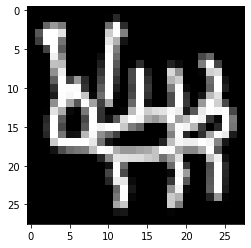

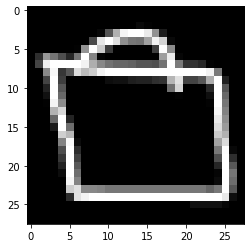

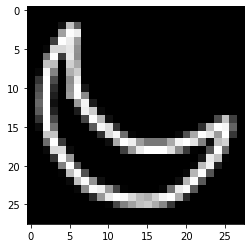

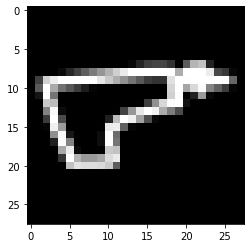

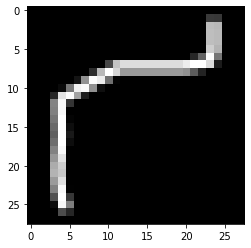

In [35]:
categories = []
for i in range(5):
    sample = df.sample(1)
    pixels = sample.drop(columns=['category', "category_enc"]).values.reshape((28, 28))
    categories.append(sample['category'].values[0])
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [36]:
categories

['ant', 'suitcase', 'banana', 'drill', 'knee']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit_transform(df['category'])
df["category_enc"] = le.transform(df['category'])
y = df['category_enc']
to_drop = ['category', 'category_enc']
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=to_drop), y, test_size=0.3,random_state=42)

MemoryError: Unable to allocate 1.52 GiB for an array with shape (784, 260103) and data type int64

In [ ]:
# from catboost import CatBoostClassifier
# 
# clf_cat = CatBoostClassifier()
# clf_cat.fit(X_train, y_train)

Learning rate set to 0.101068


In [ ]:
# from sklearn.metrics import classification_report
# 
# print(*enumerate(le.classes_))
# print(classification_report(y_test, clf_cat.predict(X_test)))

In [13]:
import tensorflow as tf
from tensorflow import keras

tf.config.experimental.set_memory_growth(tf.config.get_visible_devices('GPU')[0], True)
DROP_OUT = 6
KERNEL_SIZE = 3
CATEGORIES = len(df['category'].unique())
model = keras.Sequential([
    keras.layers.Reshape((-1,28,28,1)),
    keras.layers.experimental.preprocessing.Rescaling(scale=1./255.),

    keras.layers.Conv2D(56, kernel_size=KERNEL_SIZE, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1 * DROP_OUT),

    keras.layers.Conv2D(56, kernel_size=KERNEL_SIZE, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1 * DROP_OUT),

    keras.layers.Conv2D(56, kernel_size=KERNEL_SIZE, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1 * DROP_OUT),
    
    keras.layers.Conv2D(56, kernel_size=KERNEL_SIZE, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1 * DROP_OUT),

    keras.layers.Conv2D(56, kernel_size=KERNEL_SIZE, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1 * DROP_OUT),
        
    keras.layers.Conv2D(56, kernel_size=KERNEL_SIZE, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1 * DROP_OUT),

    keras.layers.Conv2D(56, kernel_size=KERNEL_SIZE, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1 * DROP_OUT),
    
    keras.layers.Flatten(),

    keras.layers.Dense(CATEGORIES * 10, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1 * DROP_OUT),
    
    keras.layers.Dense(CATEGORIES * 30, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1 * DROP_OUT),
    
    keras.layers.Dense(CATEGORIES * 30, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1 * DROP_OUT),

    keras.layers.Dense(CATEGORIES, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=7, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1)
print("Test acc: {}".format(test_acc ))



Epoch 1/7
3794/3794 [==============================] - 134s 35ms/step - loss: 10.6168 - accuracy: 0.0233 - val_loss: 10.7479 - val_accuracy: 0.1269
Epoch 2/7
3794/3794 [==============================] - 129s 34ms/step - loss: 7.4590 - accuracy: 0.0946 - val_loss: 7.0053 - val_accuracy: 0.1577
Epoch 3/7
3794/3794 [==============================] - 130s 34ms/step - loss: 6.0583 - accuracy: 0.0983 - val_loss: 18988.2246 - val_accuracy: 0.1402
Epoch 4/7
3794/3794 [==============================] - 130s 34ms/step - loss: 4.3805 - accuracy: 0.1412 - val_loss: 326.4281 - val_accuracy: 0.2633
Epoch 5/7
3794/3794 [==============================] - 130s 34ms/step - loss: 3.6130 - accuracy: 0.2151 - val_loss: 13897.9746 - val_accuracy: 0.3264
Epoch 6/7
3794/3794 [==============================] - 130s 34ms/step - loss: 3.4428 - accuracy: 0.2421 - val_loss: 961.6301 - val_accuracy: 0.3376
Epoch 7/7
1626/1626 [==============================] - 9s 6ms/step - loss: 1796.8673 - accuracy: 0.3470
Test a